Populating the interactive namespace from numpy and matplotlib
(640, 480)
(416, 312)
INFO:tensorflow:Restoring parameters from models/model-190532


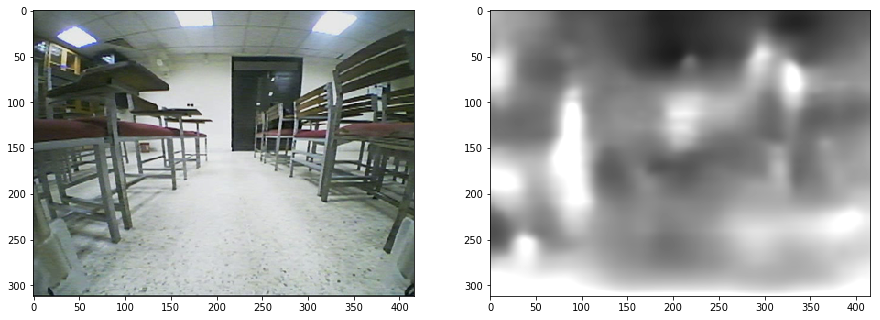

In [1]:
from __future__ import division
%pylab inline
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display
tf.reset_default_graph()

img_height=312
img_width=416
ckpt_file = 'models/model-190532'
fh = open('misc/tests/poop2.png', 'rb')
I = pil.open(fh)
print(I.size)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
print(I.size)

I = np.array(I)
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')
    figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))

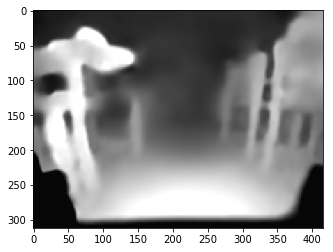

In [3]:
from PIL import Image
img = Image.open("misc/tests/poop3DepthLatest.png")
imshow(img)

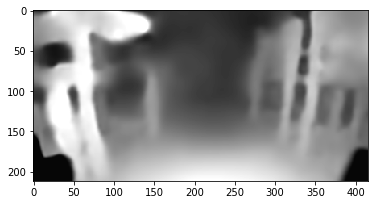

In [4]:
w, h = img.size
croppedImg = img.crop((0, 50, w, h-50)) # left, up, right, bottom
imshow(croppedImg)

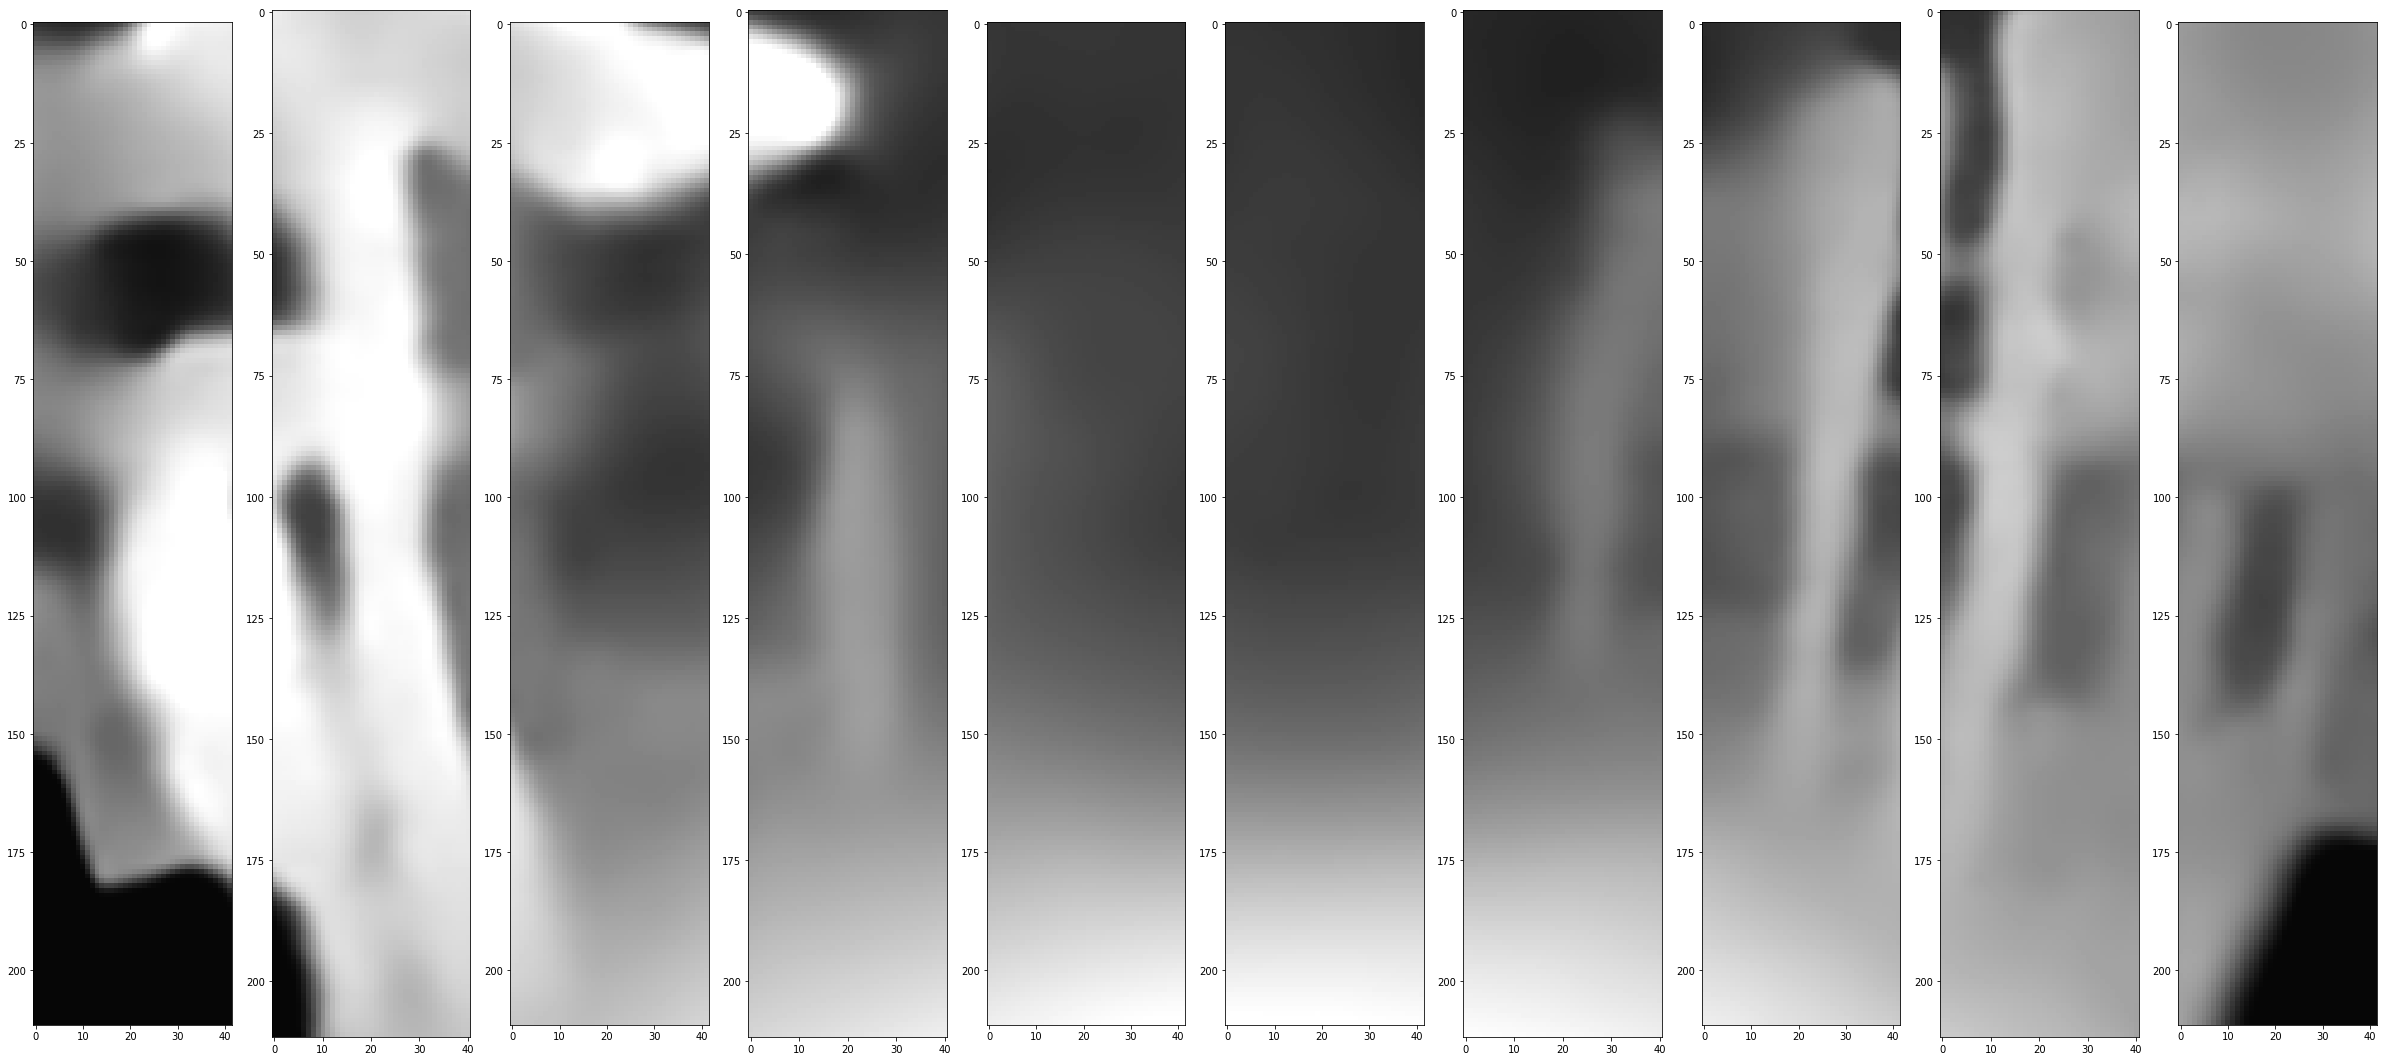

In [18]:
bin = []
fig = plt.figure(figsize=(42, 212))
columns = 10
rows = 1
for x in range(0, 10):
    binsImg = img.crop((x*(croppedImg.size[0]/10), 50, (x+1)*(croppedImg.size[0]/10), h-50)) # left, up, right, bottom
    fig.add_subplot(rows, columns, x+1)
    plt.imshow(binsImg)
plt.show()


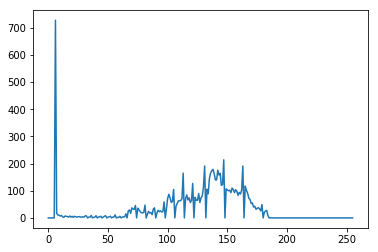

[  0   0   0   0   0   0 728  17  11  10   7   9   4   2   7   6   5   3
   7   3   6   2   6   4   3   4   5   3   3   4   3   8   7   0   3   3
   9   0   2   3   8   0   3   4   6   0   3   6   8   0   3   4   6   0
   3   3  11   0   2   2   6   0   3   4   4  15   0  26  29  17  37  33
  31  46   0  36  30  23  19  19  20  47   0  13  24  18  20  12  33  37
   0  18  28  23  26  22  23  59   0  34  72  87  74  57  60 105   0  43
  53  63  63  64  71 165   0  70  85  66  74  57  64 127   0  76  65  65
  90  57  74  81 113 191   0 106  89 146 165 174 179 163 140 140 176 158
 164 120 123 214   0 107 103 100 102  93 110 104  93 104  98  83  94  88
 103 191   0 117 102  91  73  68  53  55  40  43  32  35  38  33  26  49
   0  21  25  28   9   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [22]:
binsL = binsImg.convert('L')
plt.plot(binsL.histogram())
plt.show()
hist = np.array(binsL.histogram())
print(hist)


In [24]:
print(binsL)

<PIL.Image.Image image mode=L size=42x212 at 0x7FE25420DDD8>
